In [1]:
# Logistic Regression model

In [2]:
#import libraries
import pandas as pd

In [3]:
#Read the data and create a copy
LoanData = pd.read_csv("01Exercise1.csv")

In [4]:
LoanPrep = LoanData.copy()

In [5]:
#identify the missing values

In [6]:
LoanPrep.isnull().sum(axis=0)

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

In [7]:
# droping the rows with missing values

In [8]:
LoanPrep = LoanPrep.dropna()

In [9]:
LoanPrep

,gender,married,ch,income,loanamt,status
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y
5,Male,Yes,1.0,5417,267.0,Y
...,...,...,...,...,...,...
609,Female,No,1.0,2900,71.0,Y
610,Male,Yes,1.0,4106,40.0,Y
611,Male,Yes,1.0,8072,253.0,Y
612,Male,Yes,1.0,7583,187.0,Y


In [10]:

# Drop the irrelevant column of gender
LoanPrep = LoanPrep.drop(["gender"],axis=1)


In [11]:
#Create dummy variable for categorical variables
LoanPrep.dtypes

LoanPrep = pd.get_dummies(LoanPrep, drop_first=True)


In [12]:
#Normalize the data for loanamt and income using standard scaler

from sklearn.preprocessing import StandardScaler
scalar_ = StandardScaler()
LoanPrep['income'] = scalar_.fit_transform(LoanPrep[['income']])
LoanPrep['loanamt'] = scalar_.fit_transform(LoanPrep[['loanamt']])



In [13]:
LoanPrep

,ch,income,loanamt,married_Yes,status_Y
1,1.0,-0.128073,-0.194250,1,0
2,1.0,-0.392077,-0.971015,1,1
3,1.0,-0.461621,-0.294478,1,1
4,1.0,0.108246,-0.031380,0,1
5,1.0,0.011017,1.547205,1,1
...,...,...,...,...,...
609,1.0,-0.408754,-0.908372,0,1
610,1.0,-0.207624,-1.296754,1,1
611,1.0,0.453802,1.371807,1,1
612,1.0,0.372249,0.544929,1,1


In [14]:
#Build the logistic regression model

In [15]:
# Create the X (Independent) and Y (Dependent) dataframes

In [16]:
Y = LoanPrep[['status_Y']]
X = LoanPrep.drop(['status_Y'], axis=1)

In [17]:
# Split the X and Y dataset into training and testing set

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=1234, stratify=Y)

In [19]:
#Build the logistic Regression model

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()

In [22]:
lr.fit(X_train,Y_train)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [23]:
Y_predict =lr.predict(X_test)

In [24]:
Y_predict

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1], dtype=uint8)

In [25]:
Y_test

,status_Y
373,0
464,0
3,1
262,0
401,0
...,...
360,0
71,1
96,1
388,1


In [26]:
# Build the confusion matrix and get the accuracy/score

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [28]:
cm = confusion_matrix(Y_test,Y_predict)

In [29]:
cm

array([[ 29,  20],
       [  2, 108]])

In [30]:
score = lr.score(X_test,Y_test)

In [31]:
score

0.8616352201257862

In [32]:
cr = classification_report(Y_test,Y_predict)

In [33]:
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.59      0.72        49
           1       0.84      0.98      0.91       110

    accuracy                           0.86       159
   macro avg       0.89      0.79      0.82       159
weighted avg       0.87      0.86      0.85       159



In [34]:
score2 = accuracy_score(Y_test,Y_predict)
score2

0.8616352201257862

In [35]:
# Get the probabilities of the prediction

In [36]:
Y_prob = lr.predict_proba(X_test)[:,1]

In [37]:
Y_prob

array([0.13205154, 0.13556507, 0.80585525, 0.72892604, 0.76368982,
       0.17362279, 0.81174759, 0.78095461, 0.13348087, 0.75549986,
       0.80985834, 0.08206817, 0.80891113, 0.16363003, 0.1684673 ,
       0.8139622 , 0.7881667 , 0.73714535, 0.82284934, 0.13944529,
       0.75852871, 0.73698161, 0.80998384, 0.73961229, 0.73662987,
       0.74353726, 0.76951684, 0.7187181 , 0.80372215, 0.77871207,
       0.11740852, 0.15979222, 0.81370741, 0.81304801, 0.78170526,
       0.14353229, 0.83034976, 0.82288197, 0.1766822 , 0.82705651,
       0.74526906, 0.744386  , 0.80515961, 0.82309065, 0.12545255,
       0.09072906, 0.82153169, 0.74673919, 0.80562251, 0.83287524,
       0.18188939, 0.81385427, 0.16591426, 0.78645433, 0.78731789,
       0.18250139, 0.7091541 , 0.77210097, 0.79822718, 0.78404996,
       0.74833446, 0.80229149, 0.74632792, 0.79058868, 0.7860087 ,
       0.78837469, 0.83648173, 0.75872331, 0.7669137 , 0.77702998,
       0.76390015, 0.69152131, 0.76568453, 0.80229078, 0.72744

In [38]:
# Create predictions based on probabilities
Y_new_pred = []
threshold = 0.785

for i in range(0, len(Y_prob)):
    if Y_prob[i] > threshold:
        Y_new_pred.append(1)
    else:
        Y_new_pred.append(0)

In [39]:
Y_new_pred

[0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0]

In [40]:
cm2 = confusion_matrix(Y_test,Y_new_pred)
cr2 = classification_report(Y_test, Y_new_pred)
score2 = accuracy_score(Y_test,Y_new_pred)

In [41]:
print(cm2)

[[44  5]
 [48 62]]


In [42]:
print(cr2)

              precision    recall  f1-score   support

           0       0.48      0.90      0.62        49
           1       0.93      0.56      0.70       110

    accuracy                           0.67       159
   macro avg       0.70      0.73      0.66       159
weighted avg       0.79      0.67      0.68       159



In [43]:
score2

0.6666666666666666

In [44]:
# Get the AUC and plot the Curve
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold = roc_curve(Y_test,Y_prob)
AUC = roc_auc_score(Y_test,Y_prob)

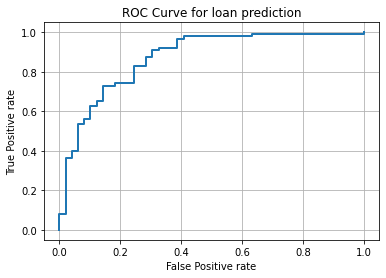

In [50]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,linewidth=2)
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC Curve for loan prediction")
plt.grid()

In [46]:
AUC

0.8716141001855288